In [13]:
## Load Dataset of breath_alcohol_ames.csv
# Load the packages
library(dplyr)
library(readr)
library(ggplot2)

# Read the data
ba_data <- read_csv("sample_data/breath_alcohol_ames.csv")

head(ba_data)

# Obtain counts for each year
ba_year <- ba_data %>% count(year)

Rows: 1556 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): location, gender
dbl (6): year, month, day, hour, Res1, Res2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,month,day,hour,location,gender,Res1,Res2
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2017,12,17,1,Ames PD,M,0.046,0.046
2017,12,14,3,ISU PD,F,0.121,0.120
2017,12,10,5,ISU PD,F,0.068,0.067
2017,12,10,3,ISU PD,F,0.077,0.077
2017,12,9,2,ISU PD,M,0.085,0.084
2017,12,9,1,Ames PD,M,0.160,0.161


In [14]:
## Identify which department get more breathalyzer tests
# Count the totals for each department
pds <- ba_data %>% count(location)
head(pds)

location,n
<chr>,<int>
Ames PD,616
ISU PD,940


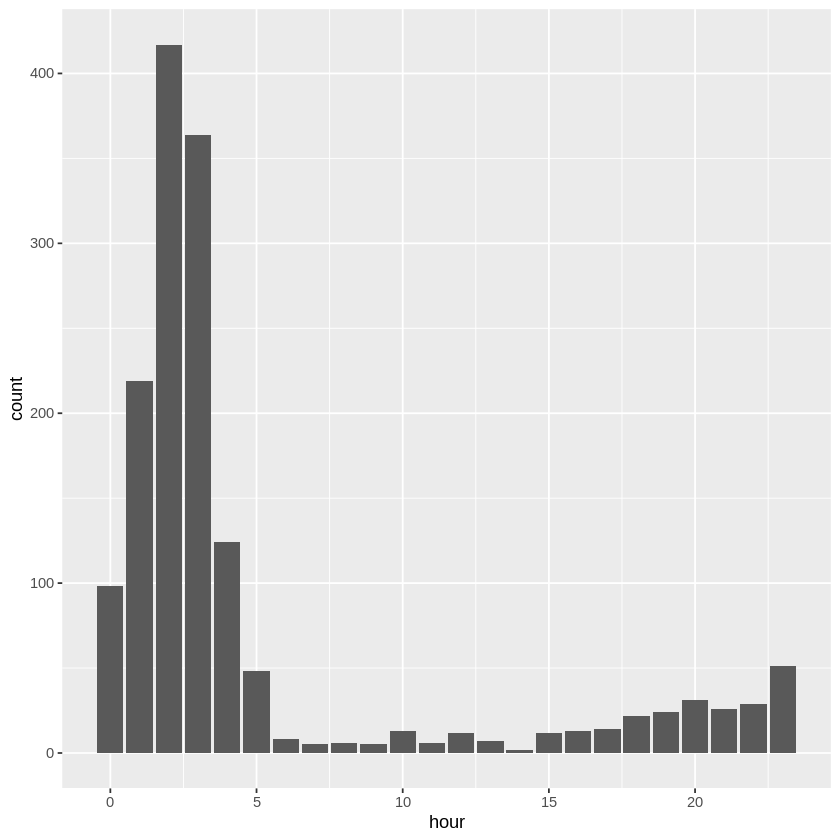

In [15]:
## Which hours of the day have the most and least tests?
# Count by hour and arrange by descending frequency
hourly <- ba_data %>% count(hour, sort = TRUE)

# Use a geom_ to create the appropriate bar chart
ggplot(hourly, aes(x = hour, weight = n)) + geom_bar()


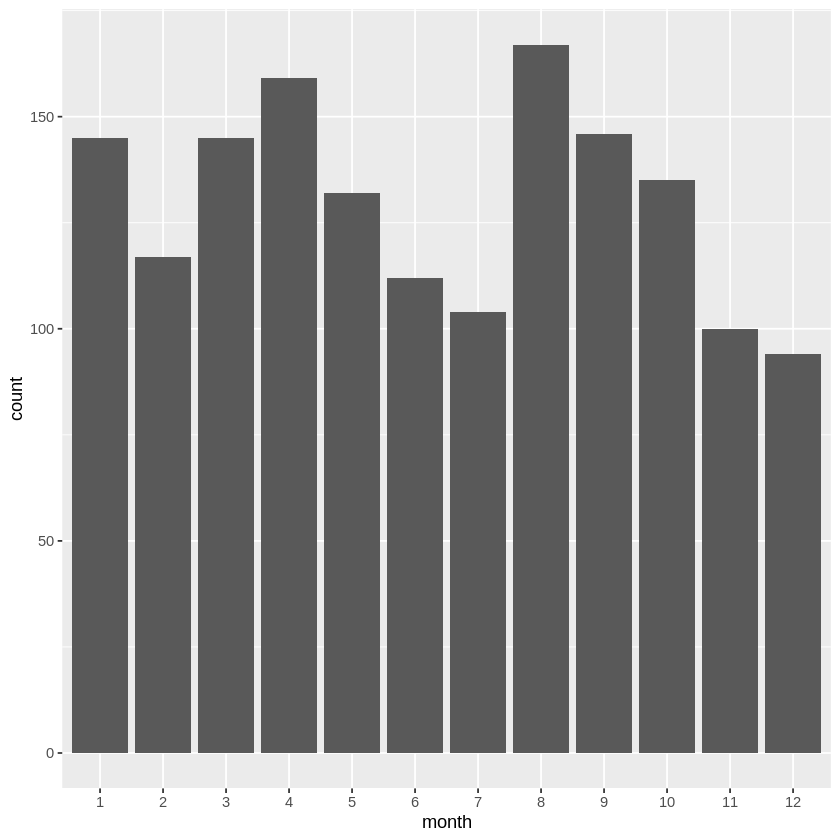

In [16]:
## Which month of the year has the most test?
# Count by month and arrange by descending frequency
monthly <- ba_data %>% count(month, sort = TRUE)

# Make month a factor
monthly$month <- as.factor(monthly$month)

# Use a geom_ to create the appropriate bar chart
ggplot(monthly, aes(x = month, weight = n)) + geom_bar()

gender,n
<chr>,<int>
F,425
M,1102
NA,29


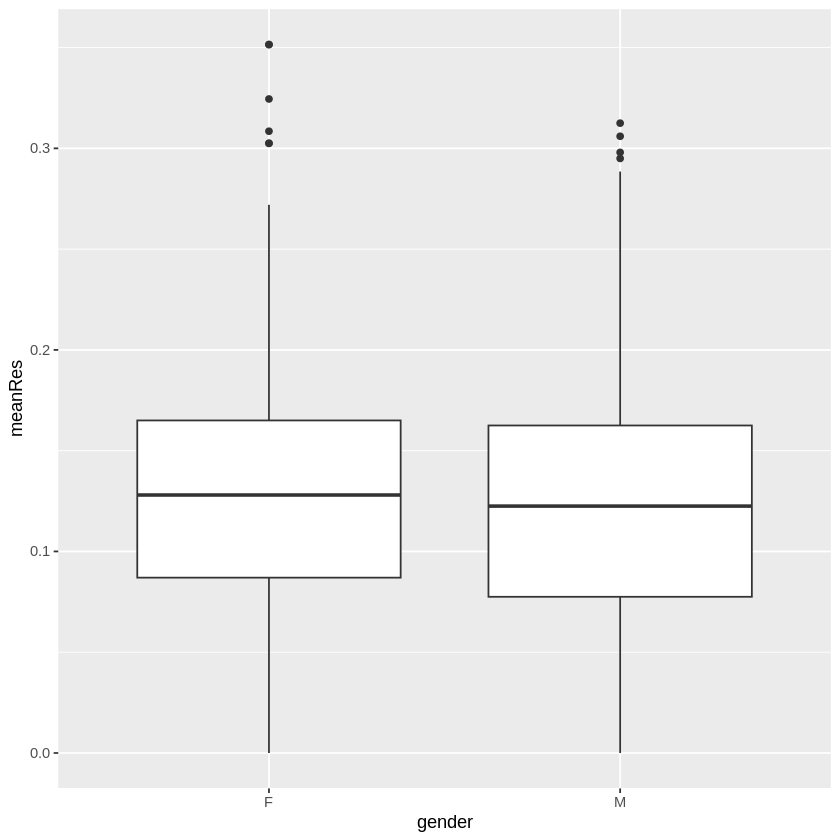

In [17]:
## As gender aspect, does men drink more than women in this dataset?
# Count by gender
ba_data %>% count(gender)

# Create a dataset with no NAs in gender
clean_gender <- ba_data %>% filter(!is.na(gender))

# Create a mean test result variable and save as mean_bas
mean_bas <- clean_gender %>% mutate(meanRes = (Res1 + Res2)/2)

# Create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ggplot(mean_bas, aes(x = gender, y = meanRes)) + geom_boxplot()

In [ ]:
## How many people would be charged with DUI (driving under the influrence) in this dataset?
# Filter the data
duis <- ba_data %>% filter(Res1 > 0.08 | Res2 > 0.08)

# Proportion of tests that would have resulted in a DUI
p_dui <- nrow(duis)/nrow(ba_data)
p_dui

[1] 0.7448586

In [21]:
## Adding week of the year in the dataset for further visaulization
# load addintional package
library(lubridate)

# Create date variable using paste() and ymd()
ba_data <- ba_data %>% mutate(date = ymd(paste(year, month, day, sep = '-')))

# Create a week variable using week()
ba_data <- ba_data %>% mutate(week = week(date))

head(ba_data)

year,month,day,hour,location,gender,Res1,Res2,date,week
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,51
2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,50
2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,50
2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49
2017,12,9,1,Ames PD,M,0.160,0.161,2017-12-09,49


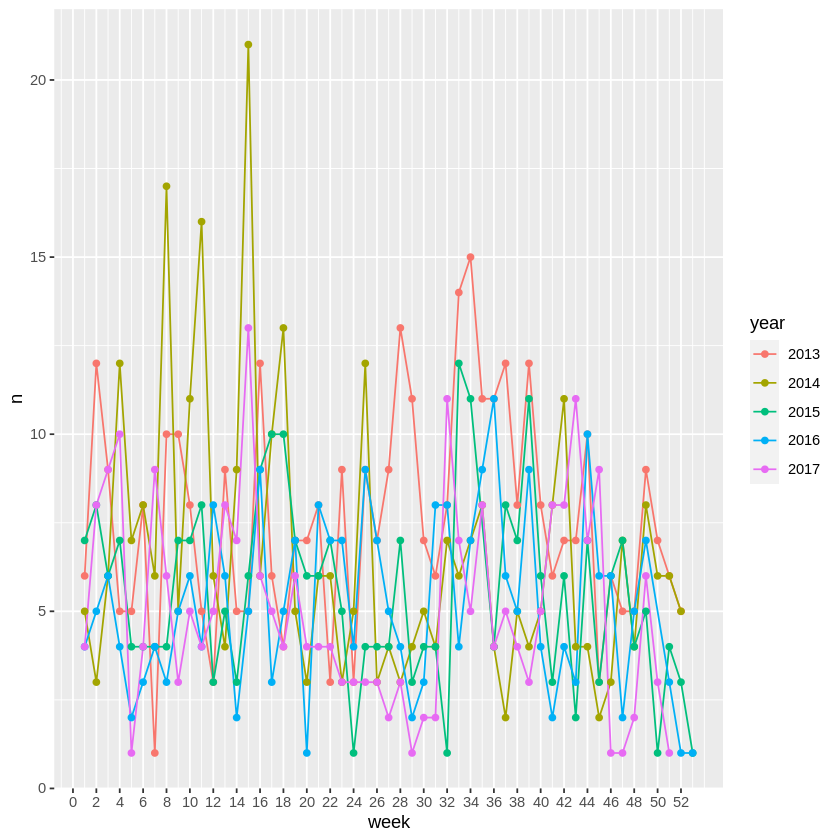

In [22]:
## Show time series plot that indicate frequency of tests by week of the year, one line per year
weekly <- ba_data %>% count(week, year)

# Make year a factor
weekly <- weekly %>% mutate(year = as.factor(year))

# Create the time series plot with one line for each year
ggplot(weekly, aes(x = week, y = n)) +
  geom_line(aes(color = year)) +
  geom_point(aes(color = year)) +
  scale_x_continuous(breaks = seq(0,52,2))

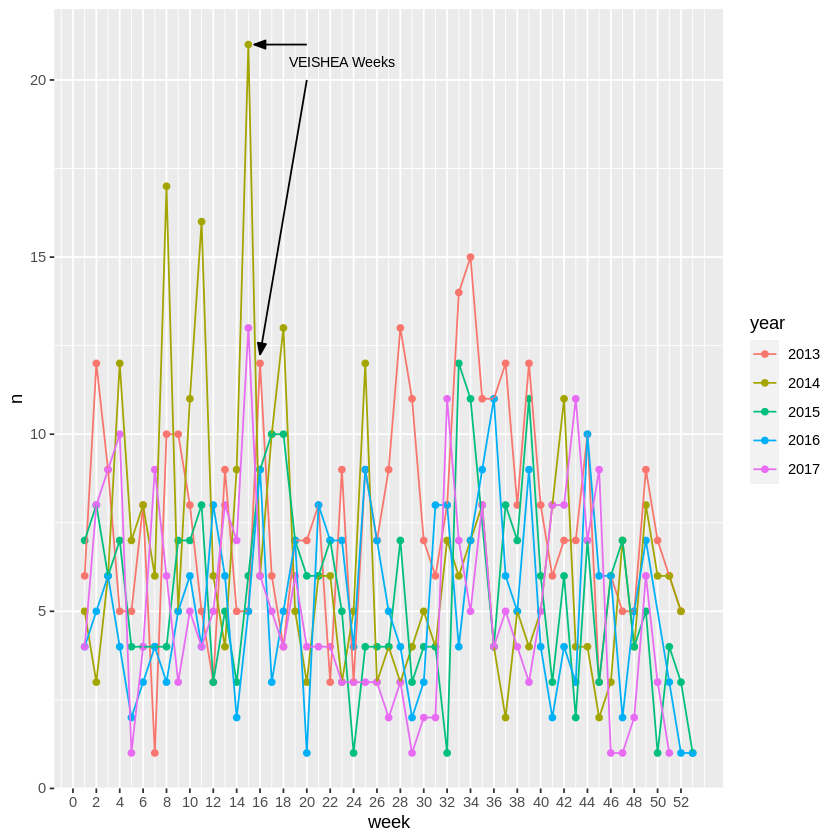

In [23]:
## VEISHA cancellation was annouced after 2024, identify how it effect the breathalyzer tests.
# Create the plot
ggplot() +
  geom_point(data = weekly, aes(x = week, y = n, color = year)) +
  geom_line(data = weekly, aes(x = week, y = n, color = year)) +  # included to make the plot more readable
  geom_segment(data = NULL, arrow = arrow(angle = 20, length = unit(0.1, "inches"),
                                          ends = "last", type = "closed"),
               aes(x = c(20,20), xend = c(15.5,16), y = c(21, 20), yend = c(21, 12.25))) +
  geom_text(data = NULL, aes(x = 23, y = 20.5, label = "VEISHEA Weeks"), size = 3) +
  scale_x_continuous(breaks = seq(0,52,2))

# Does cancelling VEISHEA is the right decision in this aspect?
cancelling_VEISHEA_was_right <- "Yes"